In [1]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat

--2022-05-01 12:33:48--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz [following]
--2022-05-01 12:33:48--  https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  21.0MB/s    in 17s     

2022-05-01 12:34:06 (19.0 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2022-05-01 12:34:11--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.

In [2]:
import scipy.io
img_labels = scipy.io.loadmat("imagelabels.mat")   #Loading data stored in the MAT-file into a simple Python data structure
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [3]:
import os
import random
import numpy as np
import cv2 as cv2
images = list()
labels = list()
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  labels.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (100,100))
  images.append(resized)
images = np.array(images)

In [4]:
for i in range(0,len(labels)):
  labels[i]=int(labels[i])

In [5]:
type(labels[0])

int

In [6]:
from collections import Counter

In [7]:
new_label = Counter(labels)
ind = list()
for i in range(len(new_label)):
  if(new_label[i]>=100):
    ind.append(i)

In [8]:
len(ind)

23

In [9]:
IMG = list()
LAB = list()
i=0
while(i<102):
  # extracting data of each class separately
  l=list()
  p=list()
  for j in range(0,len(labels)):
    if(labels[j]==i):
      l.append(images[j])
      p.append(labels[j])
  IMG.append(l)
  LAB.append(p)
  i+=1

In [10]:
lab=list()
c_ind=0
p=0
for i in ind:
  c_ind+=1
  for j in LAB[i]:
    lab.append(p)
  p+=1
img1=list()
c_ind=0
for i in ind:
  c_ind+=1
  for j in  IMG[i]:
    img1.append(j)

In [11]:
Counter(lab)

Counter({0: 108,
         1: 127,
         2: 130,
         3: 196,
         4: 258,
         5: 109,
         6: 114,
         7: 109,
         8: 102,
         9: 194,
         10: 171,
         11: 120,
         12: 107,
         13: 251,
         14: 137,
         15: 105,
         16: 166,
         17: 112,
         18: 131,
         19: 154,
         20: 184,
         21: 162,
         22: 128})

In [12]:
np.asarray(img1).shape

(3375, 100, 100, 3)

In [13]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets,layers,models 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [14]:
img1 = np.array(img1, dtype="float32")

In [15]:
type(img1[0])

numpy.ndarray

In [16]:
nn_img = np.asarray(img1)
nn_img= nn_img.reshape(len(nn_img),30000)

In [17]:
nn_img.shape

(3375, 30000)

In [18]:
np.asarray(lab).shape

(3375,)

In [19]:
(trainX_temp, testX, trainY_temp, testY) = train_test_split(nn_img, lab,
	test_size=0.20, stratify=lab, random_state=1)

In [20]:
(trainX, valX, trainY, valY) = train_test_split(trainX_temp, trainY_temp,
	test_size=0.20, stratify=trainY_temp, random_state=1)

In [21]:
trainX = trainX/255
valX = valX/255
testX = testX/255

In [22]:
from keras.utils import np_utils

valY=np.asarray(valY)     
valY = np_utils.to_categorical(valY)

trainY=np.asarray(trainY)    
trainY = np_utils.to_categorical(trainY)

testY=np.asarray(testY)  
testY= np_utils.to_categorical(testY)

In [23]:
trainY.shape

(2160, 23)

In [24]:
from tensorflow import keras

In [25]:
from keras.models import Sequential

In [27]:
simple_model = Sequential()  
simple_model.add(Dense(100, input_shape=(100*100*3,), activation='relu'))  # input layer  # using 'relu' beacuse we are dealing with non linear data

simple_model.add(Dense(80, activation='relu'))  
simple_model.add(Dense(50, activation='relu'))    
simple_model.add(Dense(23, activation='softmax'))


opt = keras.optimizers.Adam(learning_rate=0.0001)   # learning rate 
simple_model.compile(optimizer=opt , loss='categorical_crossentropy', metrics=['accuracy'])
model_history = simple_model.fit(trainX,trainY, batch_size=30, epochs=50, validation_data=(valX, valY))

Epoch 1/50
72/72 [==============================] - 4s 41ms/step - loss: 3.0355 - accuracy: 0.1074 - val_loss: 2.9258 - val_accuracy: 0.1648
Epoch 2/50
72/72 [==============================] - 2s 23ms/step - loss: 2.8250 - accuracy: 0.1935 - val_loss: 2.7548 - val_accuracy: 0.2037
Epoch 3/50
72/72 [==============================] - 2s 23ms/step - loss: 2.6508 - accuracy: 0.2426 - val_loss: 2.6171 - val_accuracy: 0.2167
Epoch 4/50
72/72 [==============================] - 2s 23ms/step - loss: 2.4781 - accuracy: 0.2787 - val_loss: 2.5163 - val_accuracy: 0.2481
Epoch 5/50
72/72 [==============================] - 2s 23ms/step - loss: 2.3383 - accuracy: 0.2917 - val_loss: 2.4023 - val_accuracy: 0.2907
Epoch 6/50
72/72 [==============================] - 2s 23ms/step - loss: 2.1983 - accuracy: 0.3412 - val_loss: 2.3477 - val_accuracy: 0.2852
Epoch 7/50
72/72 [==============================] - 2s 23ms/step - loss: 2.0705 - accuracy: 0.3889 - val_loss: 2.2653 - val_accuracy: 0.3204
Epoch 8/50
72

In [31]:
import matplotlib.pyplot as plt
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

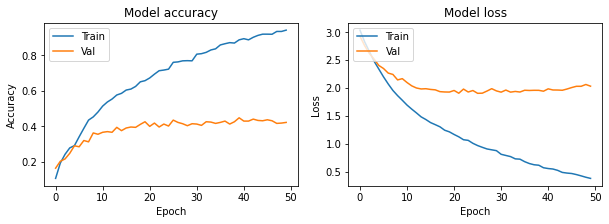

In [32]:
plot_history(model_history, 'NN')

In [29]:
predIdxs = simple_model.predict(testX, batch_size=32)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs))

              precision    recall  f1-score   support

           0       0.35      0.41      0.38        22
           1       0.35      0.32      0.33        25
           2       0.24      0.42      0.31        26
           3       0.50      0.41      0.45        39
           4       0.35      0.27      0.30        52
           5       0.71      0.91      0.80        22
           6       0.50      0.70      0.58        23
           7       0.35      0.36      0.36        22
           8       0.44      0.40      0.42        20
           9       0.35      0.33      0.34        39
          10       0.30      0.21      0.25        34
          11       0.73      0.67      0.70        24
          12       0.59      0.48      0.53        21
          13       0.66      0.50      0.57        50
          14       0.32      0.44      0.37        27
          15       0.22      0.29      0.25        21
          16       0.47      0.27      0.35        33
          17       0.30    

In [30]:
test_eval=simple_model.evaluate(testX,testY)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

22/22 [==============================] - 0s 8ms/step - loss: 2.1751 - accuracy: 0.3970
Test loss: 2.1750729084014893
Test accuracy: 0.3970370292663574


CNN- Convoutional Neural Network

In [ ]:
(trainX.shape)

(3344, 30000)

In [ ]:
testX = np.array(testX).reshape([-1, 100, 100, 3]) 

In [ ]:
testX.shape

(1046, 100, 100, 3)

In [ ]:
testY.shape

(1046, 98)

In [ ]:
trainY.shape

(3344, 98)

In [ ]:
valY.shape

(836, 98)

In [ ]:
trainX=np.array(trainX).reshape([-1, 100, 100, 3]) 

In [ ]:
valX=np.array(valX).reshape([-1, 100, 100, 3]) 

In [ ]:
len(trainX)

3344

In [ ]:
len(trainY)

3344

In [ ]:
len(valX)

836

In [ ]:
valX.shape

(836, 100, 100, 3)

In [ ]:
testX.shape

(1046, 100, 100, 3)

In [ ]:
valY.shape

(836, 98)

In [ ]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation='relu', input_shape=(100,100,3,)),
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(98, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = cnn_model.fit(trainX, trainY, validation_data = (valX, valY), epochs=30,batch_size=100)

Epoch 1/30
34/34 [==============================] - 532s 16s/step - loss: 0.3344 - accuracy: 0.0233 - val_loss: 0.1045 - val_accuracy: 0.0419
Epoch 2/30
34/34 [==============================] - 532s 16s/step - loss: 0.0662 - accuracy: 0.0440 - val_loss: 0.0503 - val_accuracy: 0.0634
Epoch 3/30
34/34 [==============================] - 531s 16s/step - loss: 0.0472 - accuracy: 0.1050 - val_loss: 0.0448 - val_accuracy: 0.1340
Epoch 4/30
34/34 [==============================] - 529s 16s/step - loss: 0.0437 - accuracy: 0.1450 - val_loss: 0.0431 - val_accuracy: 0.1651
Epoch 5/30
34/34 [==============================] - 525s 15s/step - loss: 0.0414 - accuracy: 0.1944 - val_loss: 0.0417 - val_accuracy: 0.1938
Epoch 6/30
34/34 [==============================] - 523s 15s/step - loss: 0.0387 - accuracy: 0.2386 - val_loss: 0.0402 - val_accuracy: 0.2356
Epoch 7/30
34/34 [==============================] - 517s 15s/step - loss: 0.0369 - accuracy: 0.2910 - val_loss: 0.0392 - val_accuracy: 0.2632
Epoch 

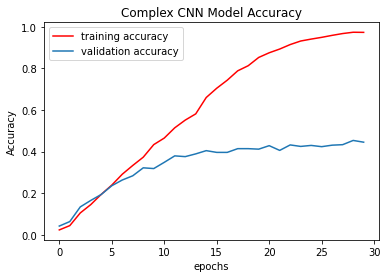

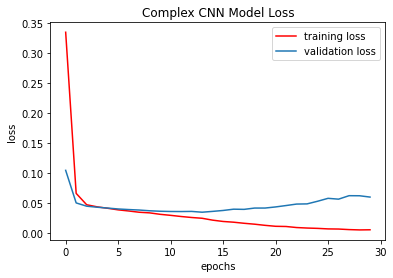

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Complex CNN Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Complex CNN Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
predLabels = cnn_model.predict(testX, batch_size=32)
predLabels = np.argmax(predLabels, axis=1)
print(classification_report(testY.argmax(axis=1), predLabels))


              precision    recall  f1-score   support

           7       0.56      0.88      0.68        17
          10       0.00      0.00      0.00        17
          11       0.67      0.82      0.74        17
          16       0.82      0.53      0.64        17
          17       0.09      0.06      0.07        16
          22       0.71      0.28      0.40        18
          28       0.67      0.62      0.65        16
          29       0.40      0.12      0.18        17
          35       0.50      0.40      0.44        15
          36       0.45      0.59      0.51        22
          40       0.47      0.31      0.37        26
          42       0.16      0.31      0.21        26
          43       0.50      0.42      0.46        19
          45       0.65      0.56      0.60        39
          47       0.43      0.43      0.43        14
          49       0.38      0.83      0.53        18
          50       0.28      0.65      0.40        52
          51       0.73    